# Wisconsin Breast Cancer Study
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

Here I analyze this dataset for a data science project, 8/2020
koehler.s.a@gmail.com

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_curve, auc, average_precision_score, recall_score, confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import validation_curve
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('datasets_180_408_data.csv')
print( df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# verifying there are no duplicate ids
len(df['id'].unique())

569

In [4]:
df = pd.get_dummies(df, drop_first = True) #malignant is true

In [5]:
df = df.drop( columns =['Unnamed: 32', 'id'])
df.drop_duplicates() 
df.dropna(axis='columns')
print( df.shape)
df.head()

(569, 31)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


<Figure size 432x288 with 0 Axes>

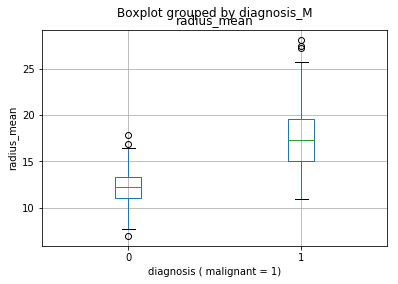

In [6]:
fig = plt.figure()
ax = df.boxplot('radius_mean','diagnosis_M')
ax.set_ylabel("radius_mean");
ax.set_xlabel("diagnosis ( malignant = 1)");
plt.show()

<Figure size 432x288 with 0 Axes>

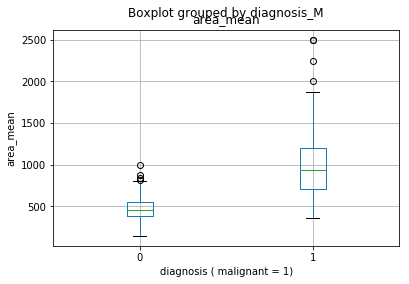

In [7]:
fig = plt.figure()
ax = df.boxplot('area_mean','diagnosis_M')
ax.set_ylabel("area_mean");
ax.set_xlabel("diagnosis ( malignant = 1)");
plt.show();

<Figure size 432x288 with 0 Axes>

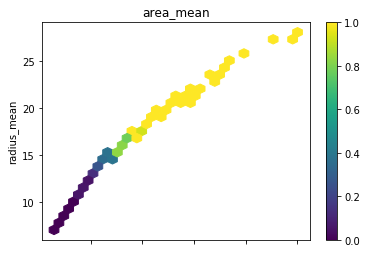

In [8]:
# explore relationship between mean area and mean radius of cells, and the likelyhood of malignance
# we see strong correlation beween mean area and radius, and that larger cells tend to be malignant
fig = plt.figure()
ax = df.plot.hexbin(x='area_mean', y='radius_mean', C='diagnosis_M', reduce_C_function=np.mean, gridsize=25,cmap="viridis")
ax.set_title( "area_mean");

<Figure size 432x288 with 0 Axes>

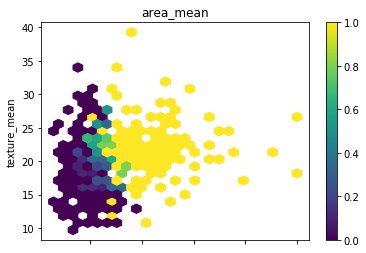

In [9]:
# here we explore relationship between mean texture and mean area, and see that there is less correlation between them
# again, we see that larger cells tend toward malignancy, but we don't see any clear trend for texture
fig = plt.figure()
ax = df.plot.hexbin(x='area_mean', y='texture_mean', C='diagnosis_M', reduce_C_function=np.mean, gridsize=25,cmap="viridis")
ax.set_title( "area_mean");

In [10]:
x_columns = df.columns[:-1]
y_column = df.columns[-1]
df[x_columns].head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
#determining how variables are correlated using Pearson's coefficient
# all geometric quantities are well correlated, like area, perimeter, radius
# whereas geometric and non-geometric are not, i.e. area_mean vs fractal_dimension, or area_mean vs texture_se
pearsons = np.zeros((x_columns.shape[0], x_columns.shape[0]))
jj, ii = np.meshgrid( np.arange( pearsons.shape[0] ), np.arange( pearsons.shape[0]))
for i in np.arange( pearsons.shape[0] ):
    for j in np.arange( pearsons.shape[1] ):
        pearsons[i][j] = np.corrcoef(df[x_columns[i]], df[x_columns[j]] )[0][1]
        
pearsons1 = pearsons.reshape( pearsons.shape[0]*pearsons.shape[0], 1)
# print( pearsons)
ii = ii.reshape( pearsons1.shape[0], 1)
jj = jj.reshape( pearsons1.shape[0], 1)
pearsons.shape
s = np.argsort(-pearsons1, axis = 0);
for i in range(x_columns.shape[0], pearsons1.shape[0], 2):
    print('{} {} {}'.format( pearsons1[s[i]][0][0], x_columns[jj[s[i]]][0][0], x_columns[ii[s[i]]][0][0] ) )

0.9978552814938109 radius_mean perimeter_mean
0.9937079161029508 radius_worst perimeter_worst
0.9873571700566117 area_mean radius_mean
0.9865068039913899 area_mean perimeter_mean
0.9840145644590743 radius_worst area_worst
0.977578091406388 perimeter_worst area_worst
0.9727936770160752 perimeter_se radius_se
0.9703868870426396 perimeter_worst perimeter_mean
0.9695389726112065 radius_worst radius_mean
0.9694763634663145 radius_worst perimeter_mean
0.9651365139559877 perimeter_worst radius_mean
0.962746086047083 radius_worst area_mean
0.9592133256498999 area_worst area_mean
0.9591195743552642 area_mean perimeter_worst
0.9518301121109903 area_se radius_se
0.9415498080023068 area_worst perimeter_mean
0.941082459586047 radius_mean area_worst
0.9376554069544155 area_se perimeter_se
0.9213910263788592 concave points_mean concavity_mean
0.9120445888404214 texture_mean texture_worst
0.9101553142985933 concave points_mean concave points_worst
0.8922608987764685 concavity_worst compactness_worst
0

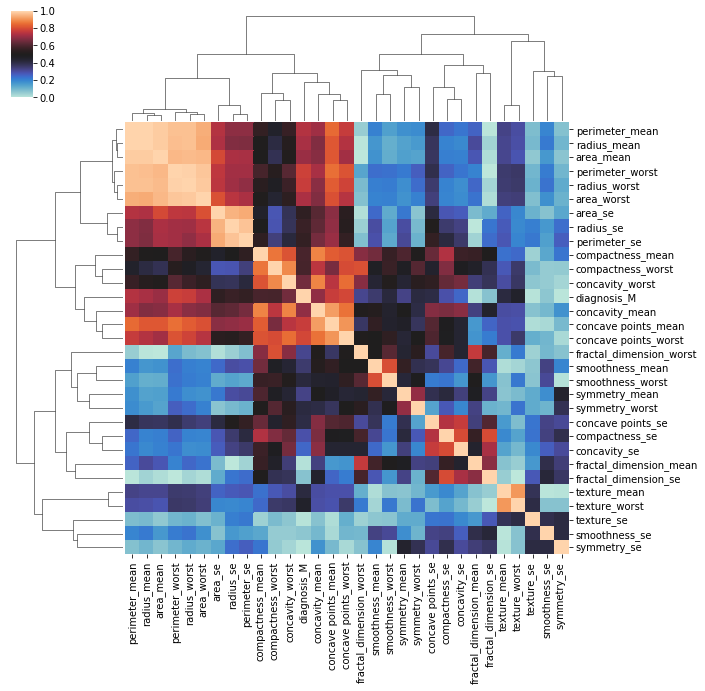

In [12]:
fig
sns.clustermap(np.abs(df.corr()), annot = False, vmin=0, vmax=1, center=0.5);

In [13]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


# MODELING

splitting up the data into train and test. standardize training set

In [14]:
X_train, X_test, y_train, y_test = train_test_split( df[x_columns], df[y_column], test_size=.2, random_state = 21, stratify = df[y_column])
# Create train and test sets
standardizer = StandardScaler()
X_train = standardizer.fit_transform(X_train)
X_test = standardizer.transform( X_test)

# KNeighborsClassifier
use pipeline for hyperparameter exploration. for KNeighborsClassifier there is only one: k

In [15]:
knn = KNeighborsClassifier()
# steps for pipeline, normalization and classifier
pipe = Pipeline([('standardizer', standardizer), ('knn', knn)])

# Create space of candidate values
search_space = [{'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 10]}]

# Create grid search 
cv = GridSearchCV(pipe, search_space, scoring = 'recall', cv=5, verbose=0).fit(X_train, y_train)# # Predict the labels of the test set: y_pred

# Fit to the training set
cv.fit( X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict( X_test )

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))
# Best neighborhood size (k)
cv.best_estimator_.get_params()['knn__n_neighbors']
y_pred = cv.predict( X_test )

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.9047619047619048
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

   micro avg       0.96      0.96      0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Tuned Model Parameters: {'knn__n_neighbors': 3}
Accuracy: 0.9047619047619048
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

   micro avg       0.96      0.96      0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Tuned Model Parameters: {'knn__n_neighbors': 3}


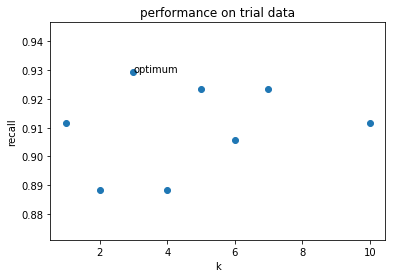

In [16]:
fig
plt.scatter( cv.param_grid[0]['knn__n_neighbors'], cv.cv_results_['mean_test_score'] )
plt.xlabel( 'k')
plt.ylabel( 'recall')
plt.title( 'performance on trial data')
plt.annotate('optimum', [cv.param_grid[0]['knn__n_neighbors'][2], cv.cv_results_['mean_test_score'][2]]);

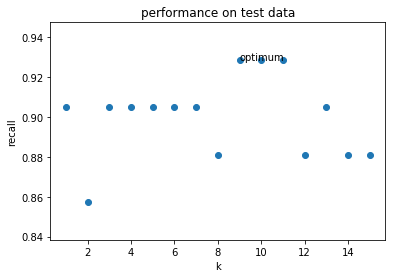

In [17]:
recalls = np.zeros(15, 'float')
ks = np.arange( 1, len(recalls)+1, 1);
for i in np.arange( 0, len(recalls), 1):
    knn = KNeighborsClassifier(n_neighbors = ks[i] )
    knn.fit(X_train, y_train)
    y_scores = knn.predict_proba(X_test)
    y_pred = knn.predict(X_test)
    recalls[i] = recall_score(y_test, y_pred, average=None)[1]
    
colors = 'rbgycmk'
fig
plt.scatter( ks, recalls);
plt.title( 'performance on test data')
plt.xlabel( 'k')
plt.ylabel( 'recall');
ind = np.argmax(recalls);
a = plt.annotate( 'optimum', [ks[ind], recalls[ind]]);    

we see that optimal k for trial data is 3, with recall of 93%. for test data, optimal recall is for k = 9, with same value. This shows that for test data the model should be more generalized.

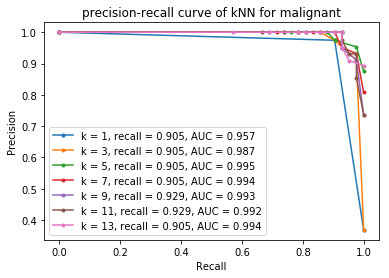

In [18]:
colors = 'rbgycmk'

fig
ks = [1,3, 5, 7, 9, 11, 13];
recalls = np.zeros(len(ks), 'float')
for i in np.arange( 0, len(ks), 1):
    knn = KNeighborsClassifier(n_neighbors = ks[i] )
    knn.fit(X_train, y_train)
    y_scores = knn.predict_proba(X_test)
    y_pred = knn.predict(X_test)
    recalls[i] = recall_score(y_test, y_pred, average=None)[1]
# keep probabilities for the positive outcome only    
    lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_scores[:, 1])
    plt.plot(lr_recall, lr_precision, marker='.', label = 'k = %d, recall = %0.3f, AUC = %0.3f' 
             %(ks[i], recalls[i], auc(lr_recall, lr_precision)) )
# axis labels
#     recall = recall_score(y_true, y_pred, average='binary')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title( '')
    
plt.legend(loc = 'lower left');
plt.title('precision-recall curve of kNN for malignant')
plt.show()
    


examine receiver operator characteristics, and precision-recall characteristics

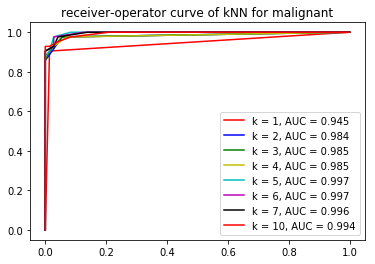

In [19]:
colors = 'rbgycmkr'

fig
for i in np.arange( 0, len(cv.param_grid[0]['knn__n_neighbors']), 1):
    knn = KNeighborsClassifier(n_neighbors = cv.param_grid[0]['knn__n_neighbors'][i])
    knn.fit(X_train, y_train)
    y_scores = knn.predict_proba(X_test)
# keep probabilities for the positive outcome only    
    fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, colors[i], label = 'k = %d, AUC = %0.3f' %(cv.param_grid[0]['knn__n_neighbors'][i], roc_auc) )
    
plt.title('receiver-operator curve of kNN for malignant')
plt.legend(loc = 'lower right');
    


# dimensionality reduction for KNeighborsClassifier
We saw that the geometric features are highly correlated, so let's try removing some of most correlated features. We repeat KNeighborsClassifier for k = 9, and see how recall changes

Index(['smoothness_se', 'compactness_worst'], dtype='object')


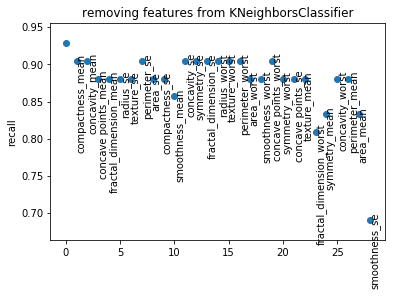

In [20]:
i_cut_off = len( x_columns) - 1
recalls = np.zeros(i_cut_off, 'float')
k = 9
knn = KNeighborsClassifier(n_neighbors = k )
for i in range( 0, i_cut_off, 1 ):
    avail_columns = np.delete(np.arange( 0, X_train.shape[1], 1), jj[s[0:i]] )
#     avail_columns = np.delete(np.arange( 0, X_train.shape[1], 1), np.union1d(jj[s[0:i]], ii[s[0:i]] ) )
    knn.fit( X_train[:,avail_columns], y_train )
    y_pred = knn.predict(X_test[:,avail_columns])
    recalls[i] = recall_score(y_test, y_pred, average=None)[1]
    if i > 0:
        plt.annotate( x_columns[jj[s[i]]][0][0], [i, recalls[i]], rotation= 90 )
    
fig
plt.scatter( range(0, i_cut_off, 1 ), recalls )   
plt.ylabel( 'recall')
plt.title( 'removing features from KNeighborsClassifier')
print( x_columns[avail_columns] )


This confirms that most of the data is highly correlated, and that you can remove at least 15 of the most correlated features without significanlty impacting the KNeighborsClassifier classifier's performance

# Support Vector Machine
pipeline for hyperparameter exploration, C and gamma. 
( C tunes bias-variance tradeoff that influences number of violations of the margin that are allowed in the training data. Gamma is the inverse of the radius of influence. )

In [21]:
# steps for pipeline, normalization and classifier
steps = [('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':np.logspace(0.0, 3.0, num=11),
              'SVM__gamma':np.logspace(-3, -1, num=5)}

# Instantiate the GridSearchCV object: cv with 5-fold validation
cv = GridSearchCV(pipeline,param_grid=parameters, cv = 5, scoring = 'recall')

# Fit to the training set
cv.fit( X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict( X_test )

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.9761904761904762
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        42

   micro avg       0.98      0.98      0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Tuned Model Parameters: {'SVM__C': 15.848931924611133, 'SVM__gamma': 0.03162277660168379}


In [22]:
cv.best_params_['SVM__C']

15.848931924611133

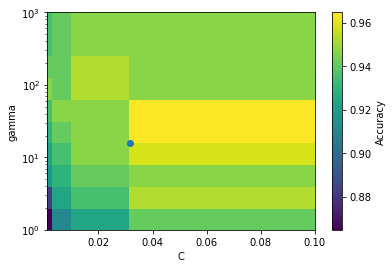

In [23]:
fig
ax = plt.subplot()
plt.pcolormesh( parameters['SVM__gamma'], parameters['SVM__C'],cv.cv_results_['mean_test_score'].reshape( [len(parameters['SVM__C']), len(parameters['SVM__gamma'])]))
plt.xlabel( 'C')
plt.ylabel( 'gamma')
plt.colorbar(orientation='vertical').set_label( 'Accuracy')
plt.scatter( cv.best_params_['SVM__gamma'], cv.best_params_['SVM__C'])
ax.set_yscale('log')
# yscale('log')
plt.show()

SVM does considerably better than KNeighborsClassifier for all metrics, in particular recall increased from 90% to 98%. This is comparable to the '92 study

# Random Forest
Create pipeline for 4 hyperparameters: n_estimators, max_depth, min_samples_split and min_samples_leaf

In [24]:
steps = [('RandomForestClassifier', RandomForestClassifier())]

pipeline = Pipeline(steps)

# n_estimators = [100, 300, 500, 800, 1200]
# max_depth = [5, 8, 15, 25, 30]
# min_samples_split = [2, 5, 10, 15, 100]
# min_samples_leaf = [1, 2, 5, 10] 

# hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
#               min_samples_split = min_samples_split, 
#              min_samples_leaf = min_samples_leaf)
# Specify the hyperparameter space
parameters = {'RandomForestClassifier__max_depth':[3, 5, 8, 10, 20],
              'RandomForestClassifier__min_samples_leaf':[1, 2, 5, 10],
              'RandomForestClassifier__min_samples_split':[ 2, 5, 10, 20],
              'RandomForestClassifier__n_estimators': [30, 50, 100],              
             }

# Instantiate the GridSearchCV object: cv with 5-fold validation
cv = GridSearchCV(pipeline,param_grid=parameters, cv = 5, scoring = 'recall')

# Fit to the training set
cv.fit( X_train, y_train )

# Predict the labels of the test set: y_pred
y_pred = cv.predict( X_test )

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.9523809523809523
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

   micro avg       0.97      0.97      0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Tuned Model Parameters: {'RandomForestClassifier__max_depth': 8, 'RandomForestClassifier__min_samples_leaf': 5, 'RandomForestClassifier__min_samples_split': 10, 'RandomForestClassifier__n_estimators': 30}


RandomForest is also comparable to the '92 study